In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import io
# from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoLars

In [ ]:
data = pd.read_csv('META_FeatureMart.csv', index_col = [0])
data.head()

,DATE,MKT-RF,SMB,HML,RMW,CMA,RF,ADS_INDEX,SP500,T10Y3M,...,USRECDM,USRECDP,META_OPEN,META_HIGH,META_LOW,META_CLOSE,META_ADJ CLOSE,META_VOLUME,META_DAILY_RETURN,META_RSI
0,1/3/2017,0.53,-0.24,0.33,-0.28,0.11,0.0,0.199210,2257.83,1.92,...,0,0,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,NaN,NaN
1,1/4/2017,1.03,0.51,0.29,-0.37,-0.10,0.0,0.178190,2270.75,1.93,...,0,0,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,0.015660,NaN
2,1/5/2017,0.50,0.02,-0.36,0.02,-0.15,0.0,0.157624,2269.00,1.85,...,0,0,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,0.016682,NaN
3,1/6/2017,-0.24,-0.52,-0.49,-0.06,-0.16,0.0,0.137503,2276.98,1.89,...,0,0,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,0.022707,NaN
4,1/9/2017,-0.11,0.04,-0.61,0.32,-0.34,0.0,0.079457,2268.90,1.88,...,0,0,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,0.012074,NaN


In [ ]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,10,31)

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
filter = (data['DATE'] >= start_date) & (data['DATE'] <= end_date)
data = data.loc[filter]
data.head()

,DATE,MKT-RF,SMB,HML,RMW,CMA,RF,ADS_INDEX,SP500,T10Y3M,...,USRECDM,USRECDP,META_OPEN,META_HIGH,META_LOW,META_CLOSE,META_ADJ CLOSE,META_VOLUME,META_DAILY_RETURN,META_RSI
1510,2023-01-03,-0.38,-0.11,-0.06,-0.25,0.32,0.02,0.045713,3824.14,-0.74,...,0,0,122.820000,126.370003,122.279999,124.739998,124.739998,35528500,0.036563,60.008232
1511,2023-01-04,0.90,-0.41,0.05,-0.74,-0.14,0.02,0.089794,3852.97,-0.86,...,0,0,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,0.021084,62.736570
1512,2023-01-05,-0.98,0.22,0.69,0.18,0.49,0.02,0.131008,3808.10,-0.95,...,0,0,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,-0.003376,61.991907
1513,2023-01-06,2.11,-0.32,-0.09,0.42,0.00,0.02,0.169369,3895.08,-1.12,...,0,0,128.970001,130.330002,126.040001,130.020004,130.020004,27584500,0.024263,65.180022
1514,2023-01-09,0.48,0.46,-0.82,0.01,-0.89,0.02,0.267322,3892.09,-1.17,...,0,0,131.160004,132.949997,129.279999,129.470001,129.470001,26649100,-0.004230,64.145305


In [ ]:
# Copying the data into another variable
data2 = data.copy()
# Normalizing the data
for column in data.columns[1:]:
    if column != 'META_ADJ CLOSE':
        data2[column] = (data[column] - data[column].mean()) / data[column].std()

In [ ]:
data2.columns

Index(['DATE', 'MKT-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_INDEX',
       'SP500', 'T10Y3M', 'OBMMIJUMBO30YF', 'DEXUSEU', 'DEXJPUS', 'DEXUSUK',
       'CBBTCUSD', 'CBETHUSD', 'T10YIE_X', 'DCOILBRENTEU', 'VIXCLS', 'DAAA',
       'DBAA', 'NIKKEI225', 'AMERIBOR', 'T10YIE_Y', 'T5YIE', 'BAMLH0A0HYM2',
       'BAMLH0A0HYM2EY', 'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M',
       'DCOILWTICO', 'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP', 'META_OPEN',
       'META_HIGH', 'META_LOW', 'META_CLOSE', 'META_ADJ CLOSE', 'META_VOLUME',
       'META_DAILY_RETURN', 'META_RSI'],
      dtype='object')

In [ ]:
# Splitting the dataset into X and y
X = data2.drop(columns=['DATE', 'META_OPEN', 'META_HIGH', 'META_LOW', 'META_CLOSE', 'META_ADJ CLOSE', 'META_DAILY_RETURN']).fillna(method='bfill')  # Dropping non-numeric columns
X = sm.add_constant(X)
y = data2['META_ADJ CLOSE']

In [ ]:
# Check for null values in each column
null_columns = np.isnan(X).any(axis=0)
null_columns

MKT-RF            False
SMB               False
HML               False
RMW               False
CMA               False
RF                False
ADS_INDEX         False
SP500             False
T10Y3M            False
OBMMIJUMBO30YF    False
DEXUSEU           False
DEXJPUS           False
DEXUSUK           False
CBBTCUSD          False
CBETHUSD          False
T10YIE_X          False
DCOILBRENTEU      False
VIXCLS            False
DAAA              False
DBAA              False
NIKKEI225         False
AMERIBOR          False
T10YIE_Y          False
T5YIE             False
BAMLH0A0HYM2      False
BAMLH0A0HYM2EY    False
DGS10             False
DGS1              False
RIFSPPFAAD90NB    False
DCPN3M            False
DCPF1M             True
DCOILWTICO        False
DHHNGSP           False
USRECD             True
USRECDM            True
USRECDP            True
META_VOLUME       False
META_RSI          False
dtype: bool

In [ ]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [ ]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (209, 35)
Shape of y: (209,)


In [ ]:
# Check for null values in each column
null_columns = np.isnan(X).any(axis=0)
null_columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# ------------------------------------------------------------------------------
# Benchmark Model
# ------------------------------------------------------------------------------

benchmark_prep = sm.OLS(y, X).fit()
benchmark_prep.summary()

# Create a boolean mask with the same number of columns as X
boolean_mask_benchmark = np.abs(benchmark_prep.tvalues) >= 1.96

# Select columns from X based on the boolean mask
x_benchmark = X[:, boolean_mask_benchmark]

# Get the column names from the original DataFrame (data2)
column_names = data2.columns

# Extract selected features based on the benchmark model mask
selected_features_benchmark = [column_names[i] for i, mask in enumerate(boolean_mask_benchmark) if mask]

# Continue with the rest of your code
benchmark = sm.OLS(y, x_benchmark).fit()
print(benchmark.summary())
y_hat_benchmark1 = benchmark.predict(x_benchmark)
corr_benchmark1 = ss.pearsonr(y_hat_benchmark1, y)[0]
print('\nBenchmark: corr(Y, Y_pred) = ' + str(corr_benchmark1))
print('Hard Thresholding selected ' + str(np.sum(boolean_mask_benchmark)) + ' features in the benchmark model.')
print('Selected features in the benchmark model:', selected_features_benchmark)

                            OLS Regression Results                            
Dep. Variable:         META_ADJ CLOSE   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2500.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.14e-210
Time:                        06:45:04   Log-Likelihood:                -605.62
No. Observations:                 209   AIC:                             1241.
Df Residuals:                     194   BIC:                             1291.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           243.7038      0.760    320.549      0.0

In [ ]:
from sklearn.linear_model import LassoLars
import statsmodels.api as sm
import numpy as np

# Assuming X and y are your features and target variable, and data2 is your DataFrame

# Step 1: Run LassoLars Regression and obtain coefficients
alpha = 0.5  # Adjust alpha as needed
lasso_lars_model = LassoLars(alpha=alpha, fit_intercept=False).fit(X, y)

# Create a boolean mask for selecting columns based on the coefficients
boolean_mask = np.abs(lasso_lars_model.coef_) >= 0.001

# Get the column names from the original DataFrame (data2)
column_names = data2.columns

# Select columns from X based on the boolean mask
x_selected = X[:, boolean_mask]

# Step 2: Run OLS with selected features
model_lasso_lars = sm.OLS(y, x_selected).fit()
print(model_lasso_lars.summary())
y_pred_lasso_lars = model_lasso_lars.predict(x_selected)
corr_lasso_lars = np.corrcoef(y_pred_lasso_lars, y)[0, 1]

# Print the selected features using the column_names list
selected_features = [column_names[i] for i, mask in enumerate(boolean_mask) if mask]
print('LassoLars: corr (Y, Y_pred) = ' + str(corr_lasso_lars))
print('LassoLars selected ' + str(len(selected_features)) + ' features: ', selected_features)


                            OLS Regression Results                            
Dep. Variable:         META_ADJ CLOSE   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2450.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          7.79e-210
Time:                        06:45:04   Log-Likelihood:                -607.69
No. Observations:                 209   AIC:                             1245.
Df Residuals:                     194   BIC:                             1296.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8401      0.338      2.487      0.0

In [ ]:
selected_features

['HML',
 'CMA',
 'ADS_INDEX',
 'T10Y3M',
 'DEXUSUK',
 'VIXCLS',
 'NIKKEI225',
 'BAMLH0A0HYM2',
 'BAMLH0A0HYM2EY',
 'DGS1',
 'RIFSPPFAAD90NB',
 'DCPN3M',
 'DCPF1M',
 'DCOILWTICO',
 'USRECD']

In [ ]:
from sklearn.linear_model import LassoLars
import statsmodels.api as sm
import numpy as np
import pandas as pd

# [Previous code to fit LassoLars and select features]

k = 25

# Get the coefficients for the selected features
selected_coefficients = lasso_lars_model.coef_[boolean_mask]

# Create a DataFrame to associate coefficients with feature names
feature_importance_df = pd.DataFrame({'Feature Name': selected_features, 'Coefficient': selected_coefficients})

# Sort the features by absolute coefficient value in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_importance_df)


      Feature Name  Coefficient
1              CMA   241.329199
10  RIFSPPFAAD90NB    18.417223
2        ADS_INDEX    13.845410
6        NIKKEI225    12.506569
11          DCPN3M     7.271761
14          USRECD     6.291976
4          DEXUSUK     5.087391
9             DGS1     3.533260
8   BAMLH0A0HYM2EY     2.802834
3           T10Y3M     2.633226
7     BAMLH0A0HYM2     2.200182
13      DCOILWTICO     0.895414
12          DCPF1M     0.633804
5           VIXCLS     0.290950
0              HML     0.239179


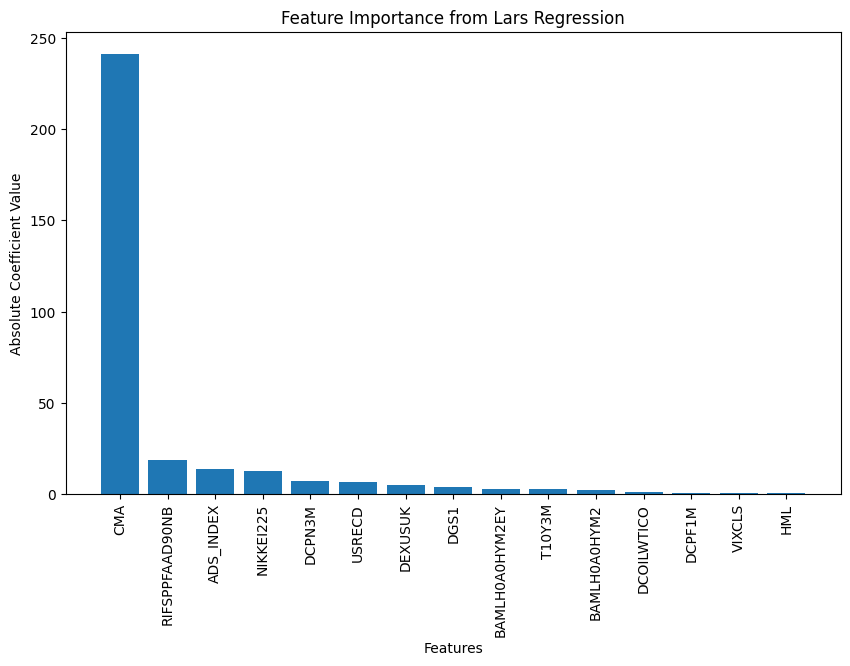

In [ ]:
feature_importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature Name'], feature_importance_df['Coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance from Lars Regression')
plt.show()

In [ ]:
# Select the top k features
top_features = feature_importance_df['Feature Name'][:k]
print(top_features)

1                CMA
10    RIFSPPFAAD90NB
2          ADS_INDEX
6          NIKKEI225
11            DCPN3M
14            USRECD
4            DEXUSUK
9               DGS1
8     BAMLH0A0HYM2EY
3             T10Y3M
7       BAMLH0A0HYM2
13        DCOILWTICO
12            DCPF1M
5             VIXCLS
0                HML
Name: Feature Name, dtype: object


In [ ]:
# Filter X_train and X_test to include only the top features
X_selected = X[:, [selected_features.index(feature) for feature in top_features]]
X_train_selected = X_train[:, [selected_features.index(feature) for feature in top_features]]
X_test_selected = X_test[:, [selected_features.index(feature) for feature in top_features]]

In [ ]:
#####################################################
# Hyperparameter Tuning
#####################################################


# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 200)
best_alpha = None
best_score = float('inf')

# Iterate over alpha values
for alpha in alphas:
    model = LassoLars(alpha=alpha, fit_intercept=False)
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()  # Convert to positive mean squared error

    if mean_score < best_score:
        best_score = mean_score
        best_alpha = alpha

print("Best alpha value:", best_alpha)

# Optionally, retrain LassoLars model using the best alpha value
lasso_lars_model_2 = LassoLars(alpha=best_alpha, fit_intercept=False).fit(X_train_selected, y_train)

Best alpha value: 0.0031440354715915


In [ ]:
y_hat = lasso_lars_model_2.predict(X_test_selected)
y_hat

array([157.2915063 , 226.8780496 , 184.46812328, 128.4460328 ,
       299.39423304, 223.30677858, 287.01600076, 299.75231061,
       230.40359443, 304.68316008, 173.76576782, 285.30845612,
       198.50097111, 298.33308498, 241.75358773, 227.83283905,
       317.52056369, 173.04068542, 224.99486235, 151.4257234 ,
       311.9257415 , 157.36209469, 135.03890467, 198.91976708,
       230.76115624, 293.9751739 , 308.82612599, 296.60230505,
       290.72008714, 289.97943674, 216.30957276, 307.71010974,
       298.34407451, 217.30354285, 285.2383518 , 306.09503573,
       301.32825267, 296.35650967, 172.94813139, 299.55042483,
       283.9596968 , 180.70358809])

In [ ]:
###############################################################################
# Cross Validation:
###############################################################################

# Perform cross-validation
cv_scores = cross_val_score(lasso_lars_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean score
mean_cv_score = np.mean(cv_scores)

# Print the results
print("Mean Cross-Validation Score:", mean_cv_score)

# Evaluate Model:
# Calculate the mean squared error and convert it back to positive
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

rmse = np.mean(np.sqrt(np.abs(cv_scores)))
std_rmse = np.std(np.sqrt(np.abs(cv_scores)))
print(f'MEAN of Mean Squared Error: {mean_mse}')
print(f'STD of RMSE Squared Error: {std_rmse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')

Mean Cross-Validation Score: -187.35637861439028
MEAN of Mean Squared Error: 187.35637861439028
STD of RMSE Squared Error: 1.836219372605393
Root Mean Squared Error on Test Set: 13.564095142325527


**There is no overfitting in the Ridge Model.**

In [ ]:
## Model Evaluation

rmse = mean_squared_error(y_test, y_hat, squared=False)
rmse

11.483670132975769

## Trading Signals

In [ ]:
# Creating input data for month of October 2023
X_updated = X_selected[-22:]
y_updated = y[-22:]

In [ ]:
# Predicting using XGBoost
y_pred = lasso_lars_model_2.predict(X_updated)
#y_pred

In [ ]:
def TRADING_RULE(P_hat, P, options):
    if options == 'BUY HOLD':
        return TRADING_RULE_1(P)
    elif options == 'LONG SHORT':
        return TRADING_RULE_2(P_hat, P)
    elif options == 'DAY TRADE':
        return TRADING_RULE_3(P_hat, P)

def TRADING_RULE_1(P):
    T = P.shape[0]
    signal = np.zeros(T)
    signal[0] = 1
    signal[-1] = -1
    return signal

def TRADING_RULE_2(P_hat, P):
    T = P.shape[0]
    signal = np.zeros(T)
    for t in range(1, T):
        if (P_hat[t-1] > P[t-1]) + (P_hat[t] < P[t]) == 2:  # FORCAST > OPEN: LONG
            signal[t] = 1
        elif (P_hat[t-1] < P[t-1]) + (P_hat[t] > P[t]) == 2:  # FORECAST < OPEN: SHORT
            signal[t] = -1
    return signal

def TRADING_RULE_3(P_hat, P):
    T = P.shape[0]
    signal = np.zeros(T)
    for t in range(1, T):
        if P_hat[t] > P[t]:  # FORCAST > OPEN: LONG
            signal[t] = 1
        elif P_hat[t] < P[t]:  # FORECAST < OPEN: SHORT
            signal[t] = -1
    return signal

In [ ]:
def calculate_profit_loss(signal, price):
    T = len(signal)
    position = np.zeros(T)
    balance = np.zeros(T)
    position[1:] = np.diff(signal)  # Buy (1) or Sell (-1) at each signal change
    balance[0] = 10000  # Initial balance
    for t in range(1, T):
        balance[t] = balance[t - 1] + position[t] * price[t]
    return balance

# Example usage:
# Assume 'price' is a numpy array or list containing the asset prices over time
# and 'signal' is the trading signal generated by TRADING_RULE function.

# Example price data
price = y_updated.values

# Example trading signal
signal = TRADING_RULE(y_pred, y_updated.values, 'DAY TRADE')

# Calculate profit and loss
profit_loss = calculate_profit_loss(signal, price)

# Display the results
print("Trading Signal:", signal)
print("Asset Prices:", price)
print("Profit and Loss:", profit_loss)

Trading Signal: [ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.]
Asset Prices: [306.8200073 300.9400024 305.5799866 304.7900085 315.4299927 318.3599854
 321.8399963 327.8200073 324.1600037 314.6900024 321.1499939 324.
 316.9700012 312.8099976 308.6499939 314.0100098 312.5499878 299.5299988
 288.3500061 296.730011  302.6600037 301.269989 ]
Profit and Loss: [10000.         9699.0599976  9699.0599976  9699.0599976  9699.0599976
  9699.0599976  9699.0599976  9699.0599976  9699.0599976  9699.0599976
  9699.0599976  9699.0599976  9699.0599976  9699.0599976  9699.0599976
 10327.0800172 10327.0800172 10327.0800172 10327.0800172 10327.0800172
 10327.0800172 10327.0800172]


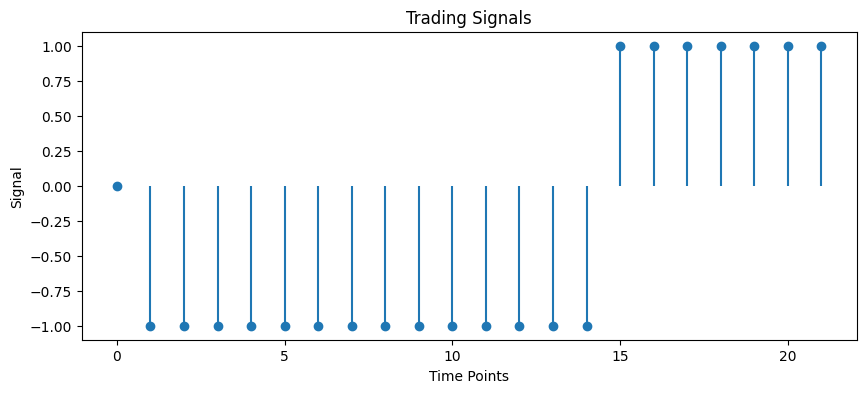

In [ ]:
trading_signals = signal

time_points = np.arange(len(trading_signals))

# Plot the trading signals
plt.figure(figsize=(10, 4))
plt.stem(time_points, trading_signals, basefmt=" ", markerfmt="o", linefmt="-")
plt.title('Trading Signals')
plt.xlabel('Time Points')
plt.ylabel('Signal')
plt.show()

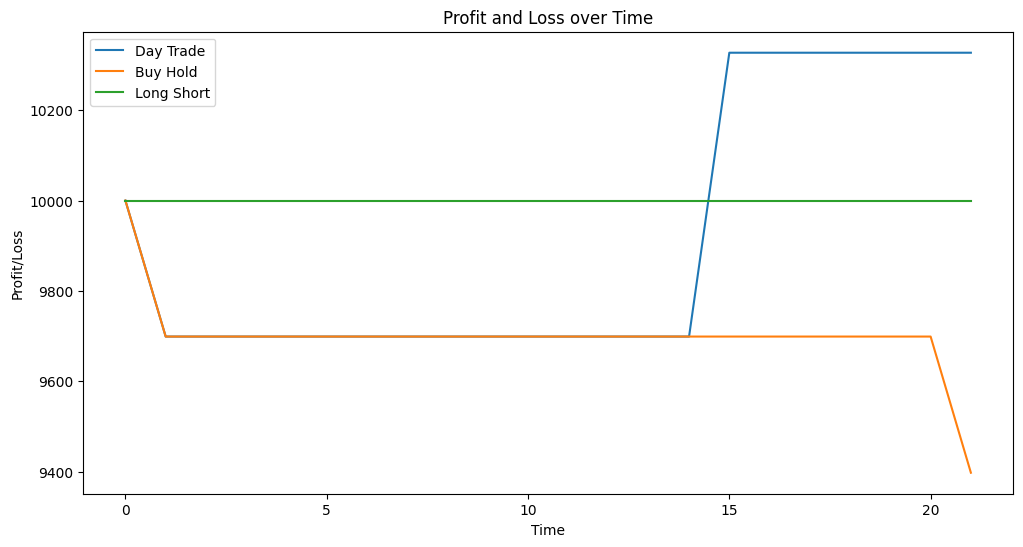

In [ ]:
# Example trading signals
signal1 = TRADING_RULE(y_pred, y_updated.values, 'DAY TRADE')
signal2 = TRADING_RULE(y_pred, y_updated.values, 'BUY HOLD')
signal3 = TRADING_RULE(y_pred, y_updated.values, 'LONG SHORT')

# Calculate profit and loss for each signal
profit_loss1 = calculate_profit_loss(signal1, price)
profit_loss2 = calculate_profit_loss(signal2, price)
profit_loss3 = calculate_profit_loss(signal3, price)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(profit_loss1, label='Day Trade')
plt.plot(profit_loss2, label='Buy Hold')
plt.plot(profit_loss3, label='Long Short')

plt.title('Profit and Loss over Time')
plt.xlabel('Time')
plt.ylabel('Profit/Loss')
plt.legend()

plt.show()

In [ ]:
Total_Profit = profit_loss[-1] - profit_loss[0]
print('Total Profit: $'+ str(np.round(Total_Profit)))

Total Profit: $327.0
